# Descripción de los modelos a evaluar

**K-NN (K-Nearest Neighbors):** Este algoritmo clasifica un punto de datos en función de la mayoría de los puntos de datos cercanos a él. Es especialmente útil para la segmentación basada en similitud.

**Decision Tree (Árbol de Decisión):** Los árboles de decisión dividen los datos en función de reglas de decisión en forma de un árbol. Son fáciles de interpretar y pueden utilizarse para segmentaciones claras basadas en reglas.

**Random Forest (Bosque Aleatorio):** Un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y reducir el sobreajuste. Puede ser útil para una segmentación robusta.

**XGBoost (Extreme Gradient Boosting):** Un algoritmo de aumento de gradientes extremos que se utiliza para tareas de segmentación y predicción. Es conocido por su alta eficacia y capacidad de manejar grandes conjuntos de datos.

**AdaBoost Regressor (AdaBoost con Regresión):** Utilizado para problemas de regresión, el algoritmo AdaBoost mejora gradualmente el rendimiento combinando múltiples modelos más simples.

**AdaBoost Classifier (AdaBoost con Clasificación):** Similar al AdaBoost Regressor, pero utilizado para problemas de clasificación.

**Extra Trees Regressor:** Una variante de Random Forest que agrega más aleatoriedad a la construcción de árboles, lo que puede llevar a una mayor robustez y generalización.

**Gradient Booster Regressor:** Este algoritmo entrena modelos en secuencia, donde cada modelo se ajusta a los errores del anterior, mejorando gradualmente el rendimiento en la predicción y la segmentación.

# Evaluación de Modelos

## K-MEANS PARA CLASIFICACIÓN

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. Sin embargo, se utilizarán técnicas de clasificación supervisada como regresión logística, máquinas de soporte vectorial (SVM), árboles de decisión, entre otros.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('C:\\Users\\Andres\\Downloads\\MachingLerningUN\\MachingLerningUN\\jbook_ml202330\\docs\\Data.csv', sep=";")
df.head()
df_activos = df[df['Recency'] <= 48]
df_inactivos = df[df['Recency'] > 48]

2. Las variables Frecuencia, y Monetario se escalan en un rango discreto de 1 a 5, 1 siendo el mas bajo, y 5 siendo el mas alto. Esto se hace por medio de segmentación en cuantiles (20%, 40%, 60%, 80%, 100%).
3. La variable Recencia se escala, similar a Frecuencia y Monetario, en un rango discreto de 1 a 5, 1 siendo el mas reciente, y 5 siendo el menos reciente.

In [3]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_activos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_activos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_activos["Frequency_Scaled"] = df_activos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_activos["Monetario_Scaled"] = df_activos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_activos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_activos["Recency_Scaled"] = df_activos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))    

Se realiza el ejercicio tanto para los Usuarios Activos como los Inactivos.

In [4]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_inactivos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_inactivos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_inactivos["Frequency_Scaled"] = df_inactivos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_inactivos["Monetario_Scaled"] = df_inactivos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_inactivos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_inactivos["Recency_Scaled"] = df_inactivos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))   

Una vez escalados los datos, se procede a crear y  entrenar el Modelo K-means para el conjunto de datos de Usuarios Activos. Se crea un objeto, en el cual se define el número de Clusters a crear (4).

In [5]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Seleccionar las columnas
X = df_activos[['Frequency_Scaled', 'Monetario_Scaled', 'Recency_Scaled']]

# Crea un objeto K-Means con el número de clusters
kmeans = KMeans(n_clusters=4)

# Entrenar el modelo K-Means
kmeans.fit(X)

# Asignar una etiqueta de cluster a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_activos['Cluster'] = labels

A continuación procedemos con la visualización de los Clusters creados por el modelo. Se crea un gráfico en 3D donde se pueden evidenciar claramente cada uno de los clusters creados. Tenemos 4 para este ejercicio, identificados con color azul, amarillo, morado y verde.

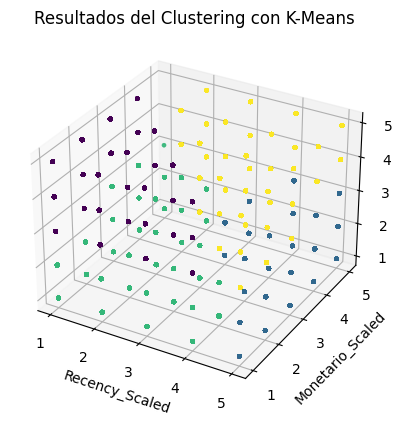

In [6]:
# Visualizar los resultados del clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_activos['Frequency_Scaled'], df_activos['Monetario_Scaled'], df_activos['Recency_Scaled'], c=labels, cmap='viridis', s=5)
ax.set_xlabel('Recency_Scaled')
ax.set_ylabel('Monetario_Scaled')
ax.set_zlabel('Frequency_Scaled')
ax.set_title('Resultados del Clustering con K-Means')
plt.show()

In [7]:
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster
2,1.001865e+09,ATLANTICO,VILLA ROSA,22/04/1995,29,Femenino,1,4,1,4990000,1,3,1,2
3,1.001937e+09,ATLANTICO,SAN ESTANISLAO DE KOSTKA,28/08/2000,23,Femenino,1,14,1,4941200,1,3,3,2
5,1.004273e+09,MAGDALENA,SANTA ROSA DE LIMA (FUNDACION),7/08/2000,24,Femenino,1,12,1,6000000,1,3,2,2
6,1.000137e+09,MAGDALENA,SEVILLA (Z. B.),7/06/2000,24,Femenino,2,13,2,2711250,2,2,2,2
7,1.007188e+09,ATLANTICO,SATO,18/12/1983,40,Masculino,1,21,1,1385000,1,1,3,0


Como se mencionó al inicio, el modelo K-Means es ideal para agrupar los datos en clusters pero no asigna etiquetas. En este caso, procederemos a asignar manualmente una categoría a cada uno de los segmentos con el fin de evaluar más adelante modelos supervisados que nos puedan entregar las etiquetas y así poder comparar.

In [8]:
# Se asignan las etiquetas de clasificación
def asignaretiqueta(cluster):
    if cluster == 0:
        return "Nuevo"
    elif cluster == 1:
        return "Bronce"
    elif cluster == 2:
        return "Plata"
    elif cluster == 3:
        return "Diamante"

df_activos['Segmento'] = df_activos['Cluster'].apply(asignaretiqueta)
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
2,1.001865e+09,ATLANTICO,VILLA ROSA,22/04/1995,29,Femenino,1,4,1,4990000,1,3,1,2,Plata
3,1.001937e+09,ATLANTICO,SAN ESTANISLAO DE KOSTKA,28/08/2000,23,Femenino,1,14,1,4941200,1,3,3,2,Plata
5,1.004273e+09,MAGDALENA,SANTA ROSA DE LIMA (FUNDACION),7/08/2000,24,Femenino,1,12,1,6000000,1,3,2,2,Plata
6,1.000137e+09,MAGDALENA,SEVILLA (Z. B.),7/06/2000,24,Femenino,2,13,2,2711250,2,2,2,2,Plata
7,1.007188e+09,ATLANTICO,SATO,18/12/1983,40,Masculino,1,21,1,1385000,1,1,3,0,Nuevo


El conjunto de Datos de Usuarios Inactivos no se procesa bajo el modelo de K-Means porque este grupo de usuarios ya es considerado un Cluster. Se Prodece a modificar el dataframe, agregando manualmente las columnas Cluster y Segmento con el fin de poder unificar este dataframe con el de usuarios Activos.

In [9]:
df_inactivos['Cluster'] = '4'
df_inactivos['Segmento'] = 'Inactivo'
df_inactivos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
0,1.001941e+09,ATLANTICO,CALAMAR,22/11/1989,34,Femenino,1,69,1,750000,1,1,3,4,Inactivo
1,1.001866e+09,ATLANTICO,SABANALARGA,23/02/1989,35,Femenino,1,73,1,1826004,1,3,3,4,Inactivo
4,1.007608e+09,MAGDALENA,BELLAVISTA (CONCORDIA) MAG,13/09/1992,32,Masculino,1,59,1,2120000,1,3,2,4,Inactivo
10,1.002072e+09,ATLANTICO,ARROYO NEGRO,4/05/1993,31,Femenino,1,97,1,1399999,1,2,5,4,Inactivo
14,1.004320e+09,MAGDALENA,PIJINO DEL CARMEN,28/07/1994,30,Masculino,1,54,1,2410000,1,4,1,4,Inactivo


Unificamos ambos dataframes para otener un solo conjunto de datos.

In [10]:
df = pd.concat([df_activos, df_inactivos], axis=0, ignore_index=True)

Obtenemos la siguiente distribución de usuarios por segmento, donde se evidencia que los Usuarios inativos tienen una distribución mucho mayor. Esto es clave para que el área de mercadeo implemente estrategias que incentiven a los usuarios a hacer compras. Los usuarios Diamante y  distribución muy similar con aproximado 55mil usuarios y los usurios Nuevos y Plata también se comportan muy parecido con un aproximado de 87mil usuarios.

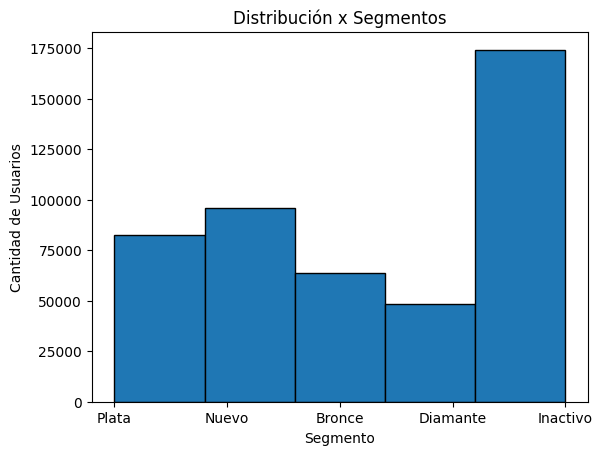

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Segmento']

plt.hist(gfrecuencia, bins=5, edgecolor='k') 

plt.xlabel('Segmento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución x Segmentos')

plt.show()

Finalmente, obtenemos un resumen de los datos por segmento. Estos datos proporcionan información sobre diferentes segmentos de usuarios, incluyendo el número de usuarios, cuán recientes son sus interacciones, con qué frecuencia interactúan y cuál es su valor monetario promedio. Estos detalles son valiosos para la segmentación de clientes y la toma de decisiones comerciales.

In [12]:
import pandas as pd

Tabla = df.groupby('Segmento').agg({
    'Identificacion': 'nunique',  # Recuento distinto de usuarios
    'Recency': 'mean',            # Promedio de Recency
    'Frequency': 'mean',          # Promedio de Frequency
    'Monetario': 'mean'           # Promedio de Monetario
}).reset_index()

Tabla.columns = ['Segmento', 'Usuarios', 'Recencia', 'Frecuencia', 'Monetario']
Tabla = Tabla.round(0)
print(Tabla)


   Segmento  Usuarios  Recencia  Frecuencia   Monetario
0    Bronce     63625       7.0         6.0  10090963.0
1  Diamante     48310      29.0         4.0   6900813.0
2  Inactivo    167495      71.0         2.0   2195770.0
3     Nuevo     94780      33.0         2.0   2891341.0
4     Plata     81886       8.0         2.0   4763626.0


## K-NN (K-Nearest Neighbors)

Este algoritmo clasifica un punto de datos en función de la mayoría de los puntos de datos cercanos a él. Es especialmente útil para la segmentación basada en similitud.

**Decision Tree (Árbol de Decisión):** Los árboles de decisión dividen los datos en función de reglas de decisión en forma de un árbol. Son fáciles de interpretar y pueden utilizarse para segmentaciones claras basadas en reglas.

**Random Forest (Bosque Aleatorio):** Un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y reducir el sobreajuste. Puede ser útil para una segmentación robusta.

**XGBoost (Extreme Gradient Boosting):** Un algoritmo de aumento de gradientes extremos que se utiliza para tareas de segmentación y predicción. Es conocido por su alta eficacia y capacidad de manejar grandes conjuntos de datos.

**AdaBoost Regressor (AdaBoost con Regresión):** Utilizado para problemas de regresión, el algoritmo AdaBoost mejora gradualmente el rendimiento combinando múltiples modelos más simples.

**AdaBoost Classifier (AdaBoost con Clasificación):** Similar al AdaBoost Regressor, pero utilizado para problemas de clasificación.

**Extra Trees Regressor:** Una variante de Random Forest que agrega más aleatoriedad a la construcción de árboles, lo que puede llevar a una mayor robustez y generalización.

**Gradient Booster Regressor:** Este algoritmo entrena modelos en secuencia, donde cada modelo se ajusta a los errores del anterior, mejorando gradualmente el rendimiento en la predicción y la segmentación.

